# Parte 1 HOUSING


In [29]:
#librerías
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [30]:
# Carga de datos
df = pd.read_csv('data/housing.csv')

In [31]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [32]:
# Convertir variables categóricas en valores numéricos
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in categorical_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})


In [33]:
# Codificar la columna 'furnishingstatus' con valores numéricos
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [34]:
# Separar características (X) y variable objetivo (y)
X = df.drop(columns=['price'])
y = df['price']

In [35]:
# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
# Transformar datos para que sean compatibles con CNN (agregar dimensión de canal)
X_scaled = np.expand_dims(X_scaled, axis=2)

In [37]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [38]:
# Definir el modelo CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)  # Salida para regresión
])

/Users/santiagoaguirre/Library/CloudStorage/OneDrive-ITESO/semestre 7/no lineales pronosticos/tarea-4-ejercicio-cnn-tarea-4-9/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# Compilar el modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [40]:
# Entrenar el modelo
history= model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24694713483264.0000 - mae: 4617584.0000 - val_loss: 30129474502656.0000 - val_mae: 5007487.5000
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 25479564230656.0000 - mae: 4709049.5000 - val_loss: 30120945385472.0000 - val_mae: 5006678.5000
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 24249821560832.0000 - mae: 4645242.5000 - val_loss: 30071867834368.0000 - val_mae: 5002022.0000
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 24709286592512.0000 - mae: 4612217.5000 - val_loss: 29910252912640.0000 - val_mae: 4986707.0000
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 26966774251520.0000 - mae: 4868384.0000 - val_loss: 29532652306432.0000 - val_mae: 4950749.0000
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 23169775697920.0000 - mae: 4501593.5000 - val_loss: 28792284250112.0000 - val_mae: 4879539.5000
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 229795

In [41]:
# Evaluar el modelo
loss, mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error: {mae}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3467862081536.0000 - mae: 1337035.2500 
Mean Absolute Error: 1284935.0


In [42]:
# Realizar predicciones
predictions = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


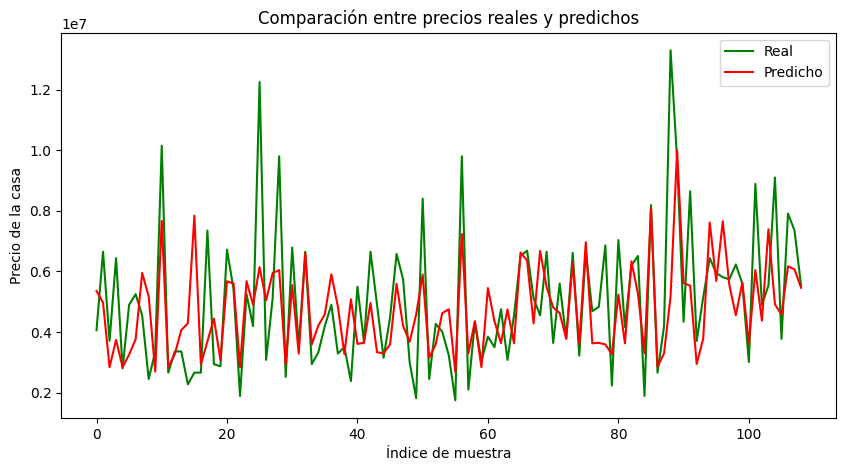

In [43]:
# Gráfico de comparación de valores reales vs predichos
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Real", color="green")
plt.plot(predictions, label="Predicho", color="red")
plt.xlabel("Índice de muestra")
plt.ylabel("Precio de la casa")
plt.title("Comparación entre precios reales y predichos")
plt.legend()
plt.show()

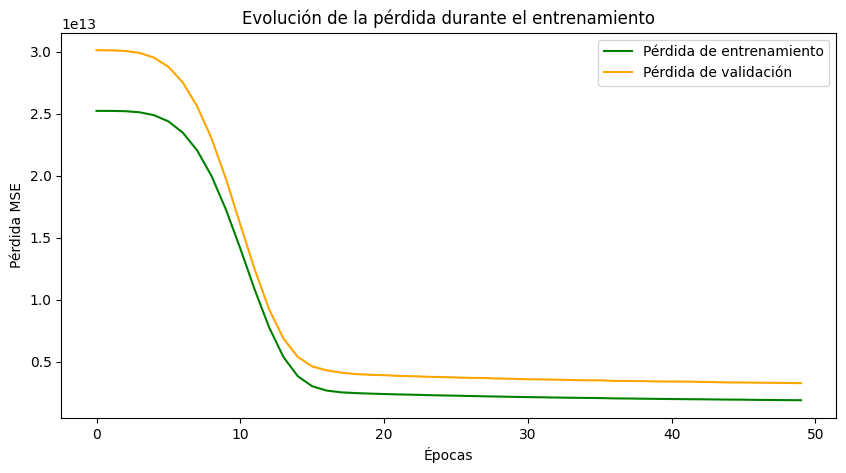

In [45]:

# Curva de error durante el entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Pérdida de entrenamiento", color="green")
plt.plot(history.history["val_loss"], label="Pérdida de validación", color="orange")
plt.xlabel("Épocas")
plt.ylabel("Pérdida MSE")
plt.title("Evolución de la pérdida durante el entrenamiento")
plt.legend()
plt.show()

# Hallazgos

* El modelo es capaz de captar la tendencia general de los precios de las casas.
* Las predicciones siguen bastante bien la distribución real de los precios.
* El modelo está aprendiendo correctamente, ya que ambas pérdidas disminuyen con el entrenamiento.
* No hay señales fuertes de underfitting (falta de aprendizaje), lo que significa que la arquitectura de la CNN es lo suficientemente compleja para captar los patrones.

Posibles problemas o mejoras:

* El modelo subestima o sobreestima algunos valores atípicos. Puede que necesite más datos para aprender mejor estos casos extremos.

* Puede haber ruido en los datos, lo que hace que algunos valores reales varíen más de lo esperado.

* Ligeras señales de overfitting: La diferencia entre la pérdida de entrenamiento y validación al final del entrenamiento sugiere que el modelo está ajustándose demasiado a los datos de entrenamiento y no generaliza perfectamente en datos nuevos.
	-	Se podría mejorar la generalización con técnicas como:
	-	Dropout en las capas densas finales para reducir la dependencia de patrones específicos.
	-	Regularización L2 para evitar que los pesos de la red se vuelvan demasiado grandes.





# PARTE 2